<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/HumanEmotionsCLF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.metrics import Accuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, CSVLogger, EarlyStopping, LearningRateScheduler
from tensorflow.keras.regularizers import L1, L2
from tensorboard.plugins.hparams import api as hp
from google.colab import drive

I DRIVE<br>
<img src='https://www.rrstar.com/gcdn/authoring/2012/02/03/NRRS/ghows-IR-72870cb2-3ef5-43e0-a8d2-2c95610f5d68-6e494260.jpeg' width=25%>

In [12]:
!pip install -q kaggle

In [13]:
!cp kaggle.json ~/.kaggle/

In [14]:
!chmod 600 /root/.kaggle/kaggle.json

In [15]:
!kaggle datasets download -d muhammadhananasghar/human-emotions-datasethes

 97% 300M/309M [00:02<00:00, 132MB/s]
100% 309M/309M [00:02<00:00, 122MB/s]


In [ ]:
!unzip '/content/human-emotions-datasethes.zip' -d '/content/dataset/'

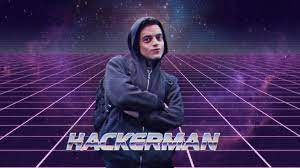

In [17]:
from tensorflow.keras.utils import image_dataset_from_directory

In [18]:
train_path = '/content/dataset/Emotions Dataset/Emotions Dataset/train'
val_path = '/content/dataset/Emotions Dataset/Emotions Dataset/test'

In [19]:
IMG_SIZE = 128

In [20]:
train_dataset = image_dataset_from_directory(
    train_path,
    image_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    batch_size=64,
    shuffle=True,
    seed=99
)

val_dataset = image_dataset_from_directory(
    val_path,
    image_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    batch_size=64,
    shuffle=True,
    seed=99
)

Found 6799 files belonging to 3 classes.
Found 2278 files belonging to 3 classes.


In [21]:
c_names = train_dataset.class_names
c_names

['angry', 'happy', 'sad']

In [22]:
import matplotlib.pyplot as plt

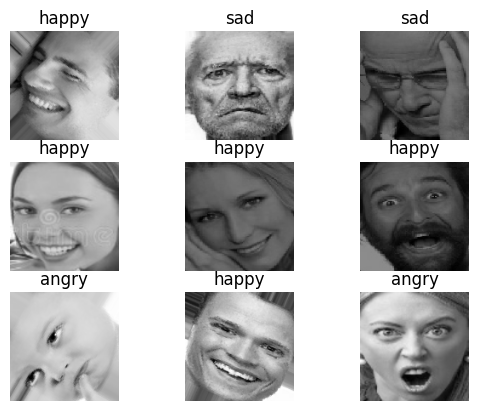

In [23]:
for im, lbl in train_dataset.take(1):
  for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.axis('off')
    plt.title(c_names[int(lbl[i])])
    plt.imshow(im[i] / 255.0);

Ok, WTF?!<br>
<img src='https://i.ibb.co/64gSYtF/2024-02-11-121136.png'>

In [24]:
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

In [25]:
val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)

In [26]:
for im, lbl in train_dataset.take(1):
  for i in range(9):
    print(im[i].shape)
    break

(128, 128, 3)


GitHub have an issue with colab code rendering<br>
<img src='https://media1.tenor.com/m/FKD_I-QWFlAAAAAd/tucker-carlson-tucker.gif' width=35%>

In [45]:
model = keras.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 48)        38448     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 48)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 43200)             0         
                                                                 
 dense_9 (Dense)             (None, 1024)             

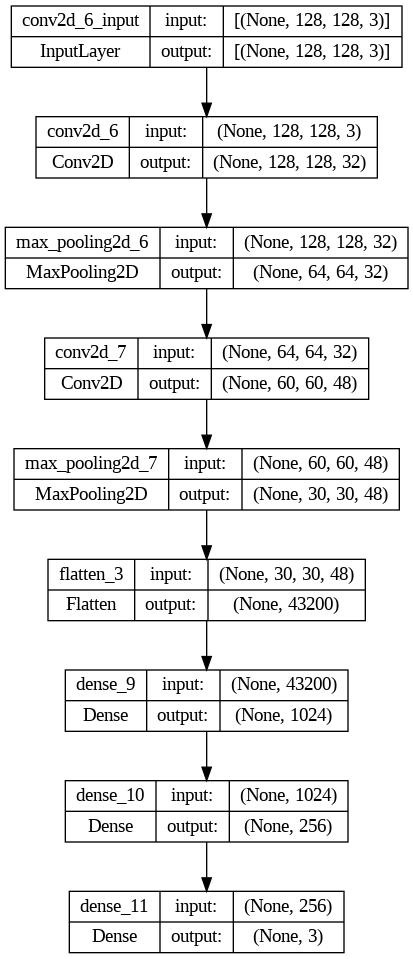

In [47]:
keras.utils.plot_model(model, show_shapes=True)

In [48]:
model.compile(
    optimizer=Adam(lr=5e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [49]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc',
                                patience=3,
                                verbose=1,
                                factor=0.2,
                                min_lr=1e-6)

In [50]:
hist = model.fit(
    train_dataset,
    validation_data=(val_dataset),
    epochs=5,
    verbose=2,
    callbacks=(reduce_lr)
)

Epoch 1/5


107/107 - 8s - loss: 42.6022 - accuracy: 0.4818 - val_loss: 1.0092 - val_accuracy: 0.5123 - lr: 0.0010 - 8s/epoch - 75ms/step
Epoch 2/5


107/107 - 7s - loss: 0.9621 - accuracy: 0.5526 - val_loss: 0.9819 - val_accuracy: 0.5312 - lr: 0.0010 - 7s/epoch - 68ms/step
Epoch 3/5


107/107 - 7s - loss: 0.8931 - accuracy: 0.5892 - val_loss: 0.9827 - val_accuracy: 0.5435 - lr: 0.0010 - 7s/epoch - 66ms/step
Epoch 4/5


107/107 - 6s - loss: 0.8190 - accuracy: 0.6383 - val_loss: 1.1959 - val_accuracy: 0.5505 - lr: 0.0010 - 6s/epoch - 59ms/step
Epoch 5/5


107/107 - 7s - loss: 0.7769 - accuracy: 0.6644 - val_loss: 1.0766 - val_accuracy: 0.5966 - lr: 0.0010 - 7s/epoch - 65ms/step


In [51]:
y_pred = model.predict(val_dataset)

36/36 [==============================] - 1s 30ms/step


In [56]:
for pred in y_pred:
  print(pred)
  break

[0.1262262 0.5905448 0.2832289]
[0.1262262 0.5905448 0.2832289]
[0.1262262 0.5905448 0.2832289]
[0.1262262 0.5905448 0.2832289]
[0.1262262 0.5905448 0.2832289]
[0.1262262 0.5905448 0.2832289]
[0.1262262 0.5905448 0.2832289]
[0.1262262 0.5905448 0.2832289]
[0.1262262 0.5905448 0.2832289]
